<a href="https://colab.research.google.com/github/horsinnaround/our-alexa/blob/main/Alexa_our_work_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!gdown 'https://amazon-massive-nlu-dataset.s3.amazonaws.com/amazon-massive-dataset-1.0.tar.gz'

Downloading...
From: https://amazon-massive-nlu-dataset.s3.amazonaws.com/amazon-massive-dataset-1.0.tar.gz
To: /content/amazon-massive-dataset-1.0.tar.gz
100% 39.5M/39.5M [00:01<00:00, 24.2MB/s]


In [ ]:
# https://www.kaggle.com/code/serkanpeldek/text-classification-with-embedding-conv1d#4.-Processing-Reviews

In [ ]:
!tar -xzvf '/content/amazon-massive-dataset-1.0.tar.gz';

1.0/
1.0/CITATION.md
1.0/NOTICE.md
1.0/data/
1.0/data/mn-MN.jsonl
1.0/data/af-ZA.jsonl
1.0/data/el-GR.jsonl
1.0/data/ta-IN.jsonl
1.0/data/ar-SA.jsonl
1.0/data/ur-PK.jsonl
1.0/data/pl-PL.jsonl
1.0/data/ko-KR.jsonl
1.0/data/az-AZ.jsonl
1.0/data/da-DK.jsonl
1.0/data/kn-IN.jsonl
1.0/data/tl-PH.jsonl
1.0/data/is-IS.jsonl
1.0/data/lv-LV.jsonl
1.0/data/it-IT.jsonl
1.0/data/es-ES.jsonl
1.0/data/fr-FR.jsonl
1.0/data/ml-IN.jsonl
1.0/data/km-KH.jsonl
1.0/data/fa-IR.jsonl
1.0/data/sw-KE.jsonl
1.0/data/en-US.jsonl
1.0/data/tr-TR.jsonl
1.0/data/bn-BD.jsonl
1.0/data/he-IL.jsonl
1.0/data/te-IN.jsonl
1.0/data/pt-PT.jsonl
1.0/data/ka-GE.jsonl
1.0/data/ja-JP.jsonl
1.0/data/id-ID.jsonl
1.0/data/ru-RU.jsonl
1.0/data/hy-AM.jsonl
1.0/data/nb-NO.jsonl
1.0/data/ms-MY.jsonl
1.0/data/sq-AL.jsonl
1.0/data/sv-SE.jsonl
1.0/data/fi-FI.jsonl
1.0/data/th-TH.jsonl
1.0/data/de-DE.jsonl
1.0/data/vi-VN.jsonl
1.0/data/my-MM.jsonl
1.0/data/jv-ID.jsonl
1.0/data/sl-SL.jsonl
1.0/data/hi-IN.jsonl
1.0/data/nl-NL.jsonl
1.0/data/z

In [ ]:
import json

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# data = []
# for id in open('./fa-IR.jsonl','r'):
#     data.append(json.loads(id))
# dataset = pd.read_csv('./v.csv')

In [ ]:
plt.rcParams['figure.figsize'] = [10,6]
plt.rcParams['figure.dpi'] = 140
plt.rcParams['savefig.dpi'] = 600
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']

In [ ]:
# plt.rcParams.keys()

In [ ]:
data = []
for id in open('/content/1.0/data/en-US.jsonl','r'):
    data.append(json.loads(id))

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/drive/MyDrive/our work/final edition/'
import os
os.mkdir(path)

In [ ]:
# Remove all unnessecary information
l = ['utt','scenario','id']

In [ ]:
dataset = pd.DataFrame(data)

In [ ]:
dataset = dataset[l]
dataset

,utt,scenario,id
0,wake me up at five am this week,alarm,0
1,wake me up at nine am on friday,alarm,1
2,set an alarm for two hours from now,alarm,2
3,quiet,audio,3
4,olly quiet,audio,4
...,...,...,...
16516,do i have emails,email,17176
16517,what emails are new,email,17177
16518,do i have new emails from john,email,17178
16519,has john sent me an email,email,17179


In [ ]:
import re

In [ ]:
def rere(x):
    x = re.sub(r"[.,.،_؟!@#$%?!]","",x)
    x = re.sub(r'[  ]',' ',x)
    return x

In [ ]:
dataset['utt'] = dataset['utt'].apply(lambda x:rere(x))

In [ ]:
dataset[dataset['scenario']=='weather'][180:189]

,utt,scenario,id
1484,the sun is shinning bright will we have this w...,weather,1542
1485,please tell me if there is going to be snow th...,weather,1543
1489,what's the weather for my location this week,weather,1547
1490,can i have the ten day forecast for me area,weather,1548
1491,will it rain this week,weather,1549
1497,how's the weather going to be this week,weather,1555
1498,please give me the weather report for this week,weather,1556
1499,get the weather forecast for this week please,weather,1557
1529,what's the weather like tomorrow,weather,1588


In [ ]:
# Check fo nan
pd.isna(dataset).sum().sum()

0

In [ ]:
from wordcloud import WordCloud as WordCloudFa
# import matplotlib.pyplot as plt


In [ ]:
wordcloud??

Object `wordcloud` not found.


In [ ]:
dataset['utt']

0            wake me up at five am this week
1            wake me up at nine am on friday
2        set an alarm for two hours from now
3                                      quiet
4                                 olly quiet
                        ...                 
16516                       do i have emails
16517                    what emails are new
16518         do i have new emails from john
16519              has john sent me an email
16520                  check email from john
Name: utt, Length: 16521, dtype: object

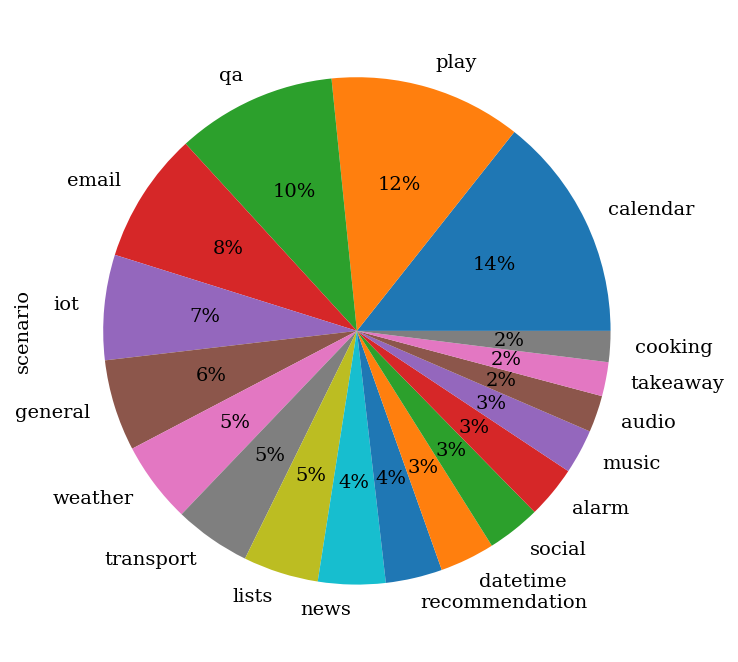

In [ ]:
dataset['scenario'].value_counts().plot.pie( legend=False, \
                   autopct='%1.0f%%')
plt.savefig(f"{path}pie_chart.png",bbox_inches='tight')

In [ ]:
# for i in set(dataset['scenario']):
#     plt.figure(figsize=(12,8))
#     text = " ".join(t for t in dataset[dataset['scenario']==i].utt)
#     wordclouds = WordCloudFa(width=800, height=600).generate(text)
#     plt.title(i)

#     plt.imshow(wordclouds, interpolation='bilinear')
#     plt.axis("off")
#     plt.show()

# BERT

In [ ]:
# https://www.youtube.com/watch?v=u--UVvH-LIQ Iulia Turc,

In [ ]:
import numpy as np

In [ ]:
!pip install tensorflow-hub 
import tensorflow_hub as hub

In [ ]:
seq =128

In [ ]:
bert = hub.KerasLayer(
    'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-128_A-2/2',
    trainable=False

)

In [ ]:
inputs  = dict(
    input_word_ids = tf.keras.layers.Input(shape=(seq,),dtype=tf.int32),
    input_mask = tf.keras.layers.Input(shape=(seq,),dtype=tf.int32),
    input_type_ids = tf.keras.layers.Input(shape=(seq,),dtype=tf.int32)
)

In [ ]:
bert_outputs = bert(inputs)

In [ ]:
cls_embedding = bert_outputs['pooled_output']


In [ ]:
classifier = tf.keras.layers.Dense(18,activation='softmax')

In [ ]:
classifier_output = classifier(cls_embedding)

In [ ]:
model = tf.keras.Model(inputs=inputs, outputs=classifier_output)

In [ ]:
model.compile(optimizer=tf.keras.optimizers.RMSprop()
              ,loss='categorical_crossentropy',
              metrics=[tf.keras.metrics.Recall(),tf.keras.metrics.Precision(),'accuracy',tf.keras.metrics.AUC()]
            #   metrics=['accuracy']
              )
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 128)]        0           []                               
                                                                                                  
 input_3 (InputLayer)           [(None, 128)]        0           []                               
                                                                                                  
 input_1 (InputLayer)           [(None, 128)]        0           []                               
                                                                                                  
 keras_layer (KerasLayer)       {'pooled_output': (  4385921     ['input_2[0][0]',                
                                None, 128),                       'input_3[0][0]',            

In [ ]:
# !pip install transformers
from transformers import AutoTokenizer as Au

In [ ]:
tok = Au.from_pretrained('bert-base-cased')

In [ ]:
tokens = tok.encode_plus("hello worls", max_length=seq,
                         truncation=True, padding='max_length',
                         add_special_tokens=True,
                         return_token_type_ids=False,
                         return_attention_mask = True,
                         return_tensors='tf')

In [ ]:
tokens

{'input_ids': <tf.Tensor: shape=(1, 128), dtype=int32, numpy=
array([[  101, 19082,   192,  1766,  3447,   102,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0, 

In [ ]:
Xids = np.zeros((len(dataset),seq))
Xmask = np.zeros((len(dataset),seq))


In [ ]:
Xids.shape

(16521, 128)

In [ ]:
for i, sequen in enumerate(dataset.utt):
    token = tok.encode_plus("hello worls", max_length=seq,
                         truncation=True, padding='max_length',
                         add_special_tokens=True,
                         return_token_type_ids=False,
                         return_attention_mask = True,
                         return_tensors='tf')
    Xids[i,:],Xmask[i,:] = token['input_ids'], token['attention_mask']

In [ ]:
Xids

array([[  101., 19082.,   192., ...,     0.,     0.,     0.],
       [  101., 19082.,   192., ...,     0.,     0.,     0.],
       [  101., 19082.,   192., ...,     0.,     0.,     0.],
       ...,
       [  101., 19082.,   192., ...,     0.,     0.,     0.],
       [  101., 19082.,   192., ...,     0.,     0.,     0.],
       [  101., 19082.,   192., ...,     0.,     0.,     0.]])

In [ ]:
Xmask

array([[1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       ...,
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.]])

In [ ]:
# arr = dataset.label
# labels = np.zeros((arr.size,arr.max()+1))

In [ ]:
labels = labels.astype('int32')

In [ ]:
dataset2 = tf.data.Dataset.from_tensor_slices((Xids, Xmask, labels))

In [ ]:
for i in dataset2.take(1):
    print(i)


(<tf.Tensor: shape=(128,), dtype=float64, numpy=
array([  101., 19082.,   192.,  1766.,  3447.,   102.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0

In [ ]:
# # One hot encoding train labels
# Y = dataset['label'].to_numpy()
# b = np.zeros((Y.size, Y.max() + 1))
# b[np.arange(Y.size), Y] = 1
# labels = b

In [ ]:
# X = 

In [ ]:
def masps(input_ids,masks,labels):
    return {'input_ids':input_ids, 'attention_mask':masks}, labels

In [ ]:
dataset2 = dataset2.map(masps)

In [ ]:
for i in dataset2.take(1):
    print(i)

({'input_ids': <tf.Tensor: shape=(128,), dtype=float64, numpy=
array([  101., 19082.,   192.,  1766.,  3447.,   102.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,

In [ ]:
dataset3 = dataset2.shuffle(100000).batch(32)

In [ ]:
dsln = len(list(dataset3))
dsln

517

In [ ]:
train = dataset3.take(int(0.8*dsln))
test = dataset3.skip(int(0.8*dsln))

In [ ]:
from transformers import TFAutoModel as Am

In [ ]:
bert = Am.from_pretrained('bert-base-cased')

Downloading:   0%|          | 0.00/527M [00:00<?, ?B/s]

Some layers from the model checkpoint at bert-base-cased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-cased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [ ]:
input_ids = tf.keras.layers.Input(shape=(seq,),name='input_ids',dtype='int32')
mask = tf.keras.layers.Input(shape=(seq,),name='attention_mask',dtype='int32')


In [ ]:
input_ids

<KerasTensor: shape=(None, 128) dtype=int32 (created by layer 'input_ids')>

In [ ]:
embedding = bert(input_ids, attention_mask=mask)[0]

X = tf.keras.layers.GlobalAveragePooling1D()(embedding)
X = tf.keras.layers.BatchNormalization()(X)
X = tf.keras.layers.Dense(128, activation='relu')(X)
X = tf.keras.layers.Dropout(0.1)(X)
X = tf.keras.layers.Dense(128, activation='relu')(X)
y = tf.keras.layers.Dense(18, activation='softmax', name='output')(X)

model = tf.keras.Model(inputs=[input_ids,mask], outputs=y)

In [ ]:
model.layers[2].trainable = False

In [ ]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_ids (InputLayer)         [(None, 128)]        0           []                               
                                                                                                  
 attention_mask (InputLayer)    [(None, 128)]        0           []                               
                                                                                                  
 tf_bert_model (TFBertModel)    TFBaseModelOutputWi  108310272   ['input_ids[0][0]',              
                                thPoolingAndCrossAt               'attention_mask[0][0]']         
                                tentions(last_hidde                                               
                                n_state=(None, 128,                                         

In [ ]:
model.compile(optimizer=tf.keras.optimizers.RMSprop()
              ,loss='categorical_crossentropy',
            #   metrics=[tf.keras.metrics.Recall(),tf.keras.metrics.Precision(),'accuracy',tf.keras.metrics.AUC()]
              metrics=['accuracy']
              )
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_ids (InputLayer)         [(None, 128)]        0           []                               
                                                                                                  
 attention_mask (InputLayer)    [(None, 128)]        0           []                               
                                                                                                  
 tf_bert_model (TFBertModel)    TFBaseModelOutputWi  108310272   ['input_ids[0][0]',              
                                thPoolingAndCrossAt               'attention_mask[0][0]']         
                                tentions(last_hidde                                               
                                n_state=(None, 128,                                         

In [ ]:
model.fit(train,validation_data=test,epochs=100)

Epoch 1/100
  4/413 [..............................] - ETA: 1:50:09 - loss: 3.1171 - recall_23: 0.0000e+00 - precision_23: 0.0000e+00 - accuracy: 0.0547 - auc_23: 0.5286

KeyboardInterrupt: ignored

In [ ]:
train

<TakeDataset element_spec=({'input_ids': TensorSpec(shape=(None, 128), dtype=tf.float64, name=None), 'attention_mask': TensorSpec(shape=(None, 128), dtype=tf.float64, name=None)}, TensorSpec(shape=(None, 18), dtype=tf.int32, name=None))>

In [ ]:
history = model.fit(dataset2,200)


ValueError: ignored

In [ ]:
trainpadded = TVT(datatrain.utt)
testpadded = TVT(datatest.utt)

# Machine Learning / Deep Learning

In [ ]:
# # Creating the deep learning model
# model = tf.keras.Sequential()
# model.add(Input( shape=(X.shape[1],)))

# # model.add(layers.Dense(256,'relu',kernel_regularizer = tf.keras.regularizers.L2(0.001)))
# # model.add(layers.Dropout(0.3))

# model.add(layers.Dense(128,'relu',kernel_regularizer = tf.keras.regularizers.L2(0.001)))
# model.add(layers.Dropout(0.3))

# model.add(layers.Dense(64,'relu',kernel_regularizer = tf.keras.regularizers.L2(0.001)))
# model.add(layers.Dropout(0.3))

# model.add(layers.Dense(18, activation='softmax'))

# model.summary()


In [ ]:
# model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
# history = model.fit(X,Y,32,8,validation_data=(x,y))

In [ ]:
# pd.DataFrame(history.history).plot();


In [ ]:
# y_test = model.predict(x)
# y_pre = y_test.argmax(axis=1)
# y_tre = y.argmax(axis=1)
# print(f"the accuracy is: {(y_pre==y_tre).sum()/y_pre.shape[0]}")

In [ ]:
# # Check if th predict label is true or not
# v = 6
# y_test = model.predict(x[v:v+1])
# print(label[y_test.argmax()],label[y[v].argmax()])

In [ ]:
# def generate(text):
#     text = rere(text)
#     new = np.zeros(dataset_dummy.columns.shape[0]-1)
#     newt = text.split()
#     for i,ne in enumerate(dataset_dummy.columns):
#         if ne in newt:
#             # print(ne)
#             new[i]=1
#     print(f'{int(new.sum())}/{len(newt)}')
#     return new

In [ ]:

# text = input()

# xp = generate(text)

# y_test = model.predict(xp.reshape((1,-1)));
# p = np.flip(np.argsort(y_test))[0][0:4]
# print('it could be:\n{} with {}\n{} with {}\n{} with {}'.format(label[p[0]],y_test[0][p[0]],label[p[1]],y_test[0][p[1]],label[p[2]],y_test[0][p[2]]))

# Text vec

# Embedding

In [ ]:

dataset = dataset.sample(frac=1)
dataset['label'],label = dataset['scenario'].factorize()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer

In [ ]:
import tensorflow as tf
# device_name = tf.test.gpu_device_name()
# if device_name != '/device:GPU:0':
#   raise SystemError('GPU device not found')
# print('Found GPU at: {}'.format(device_name))

In [ ]:
datatest = dataset[0:-1:5]
datatrain = dataset.drop(datatest.index)
Y = datatrain['label'].to_numpy()
y = datatest['label'].to_numpy()

In [ ]:
sentences = datatrain['utt']
tokenizer = Tokenizer(oov_token="<OOV>",)
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index
print(len(word_index))

5686


In [ ]:
trainsequences = tokenizer.texts_to_sequences(datatrain['utt'])
testsequences = tokenizer.texts_to_sequences(datatest['utt'])


In [ ]:
wc=tokenizer.word_counts

In [ ]:
from collections import OrderedDict
newlist = (OrderedDict(sorted(wc.items(), key=lambda t: t[1], reverse=True)))

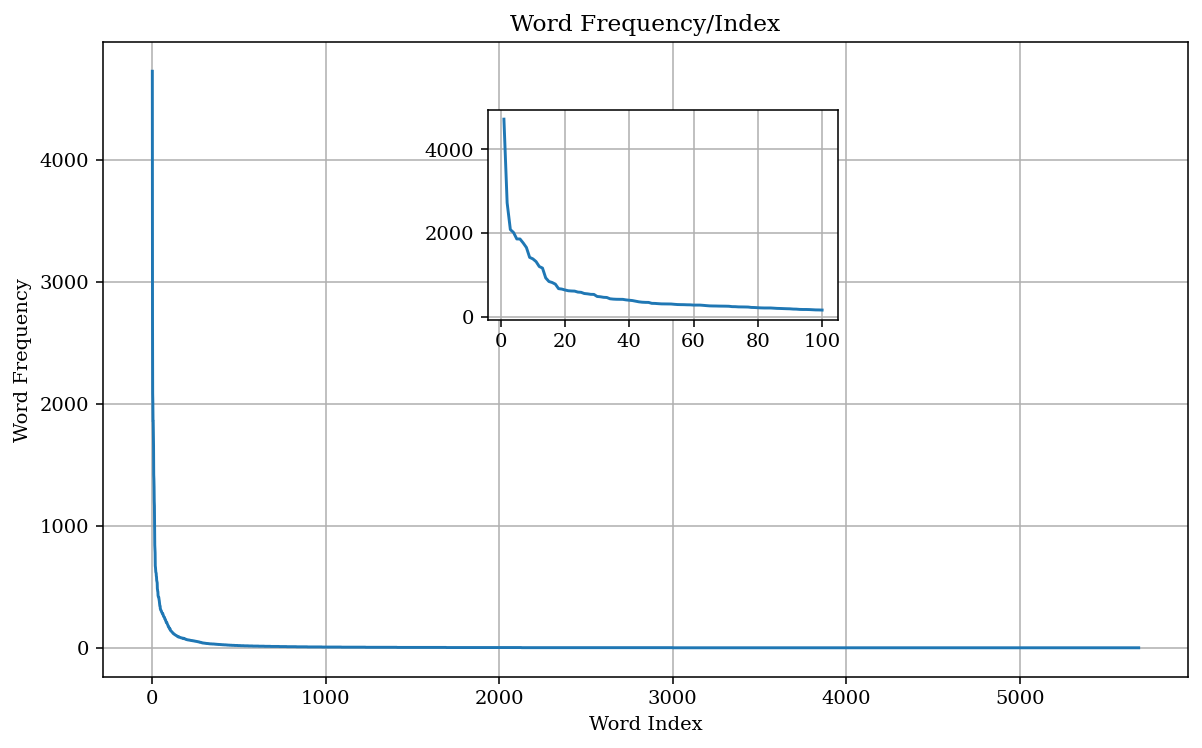

In [ ]:
xs=[]
ys=[]
curr_x = 1
for item in newlist:
    xs.append(curr_x)
    curr_x=curr_x+1
    ys.append(newlist[item])
plt.plot(xs,ys)
plt.title('Word Frequency/Index')
plt.xlabel('Word Index')
plt.ylabel("Word Frequency")
plt.grid()
ax2 = plt.axes([0.4, 0.55, 0.25, 0.25])
ax2.plot(xs[0:100],ys[0:100])
plt.grid()

plt.savefig(f'{path}word frequency.png',bbox_inches='tight')
plt.show()

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
from tensorflow import keras

import tensorflow as tf

In [ ]:
tf.data.Dataset.from_tensor_slices(["foo", "bar", "baz"])

<TensorSliceDataset element_spec=TensorSpec(shape=(), dtype=tf.string, name=None)>

In [ ]:
datatrain.utt

12312                     how long until we get to chicago
14003                   why did gotse shoot mahatma gandhi
12070                      i want a train ticket to oregon
9054     start radio channel eight hundred and eighty nine
6963     what events do i have planned for the next two...
                               ...                        
2573     what is the entrepreneur saying about homeless...
6250                                    what's the weather
16059    open up my sister's email from yesterday click...
10531       what do i need to complete first from the list
10324                                 get rid of this list
Name: utt, Length: 13217, dtype: object

In [ ]:
hj = np.zeros(len(trainsequences))
for i,j in enumerate(trainsequences):
              hj[i] = len(j)

In [ ]:
hj

array([ 7.,  6.,  7., ..., 17., 10.,  5.])

In [ ]:
np.sum(hj>20)/hj.shape[0]

0.003480366195051827

In [ ]:
m = np.zeros(50)
for i in range(50):
    m[i] = np.sum(hj>i)/hj.shape[0]

array([ 7.,  6.,  7., ..., 17., 10.,  5.])

In [ ]:
hjj = hj / hj.max()

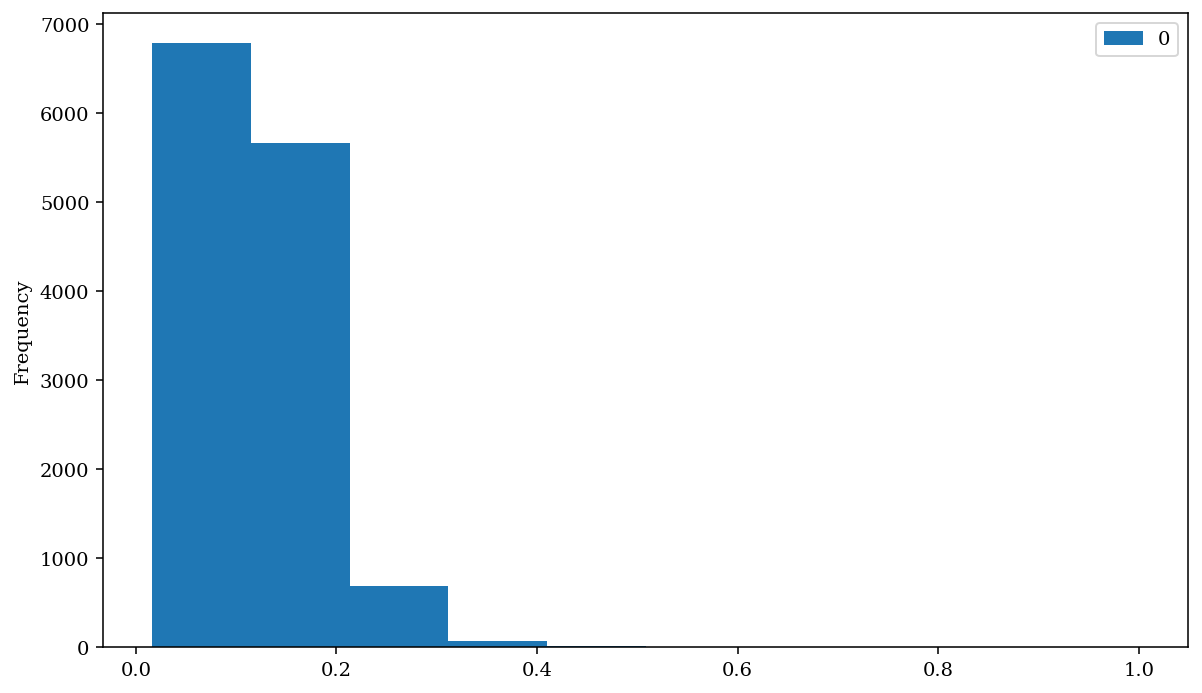

In [ ]:
pd.DataFrame(hjj).plot(kind='hist')

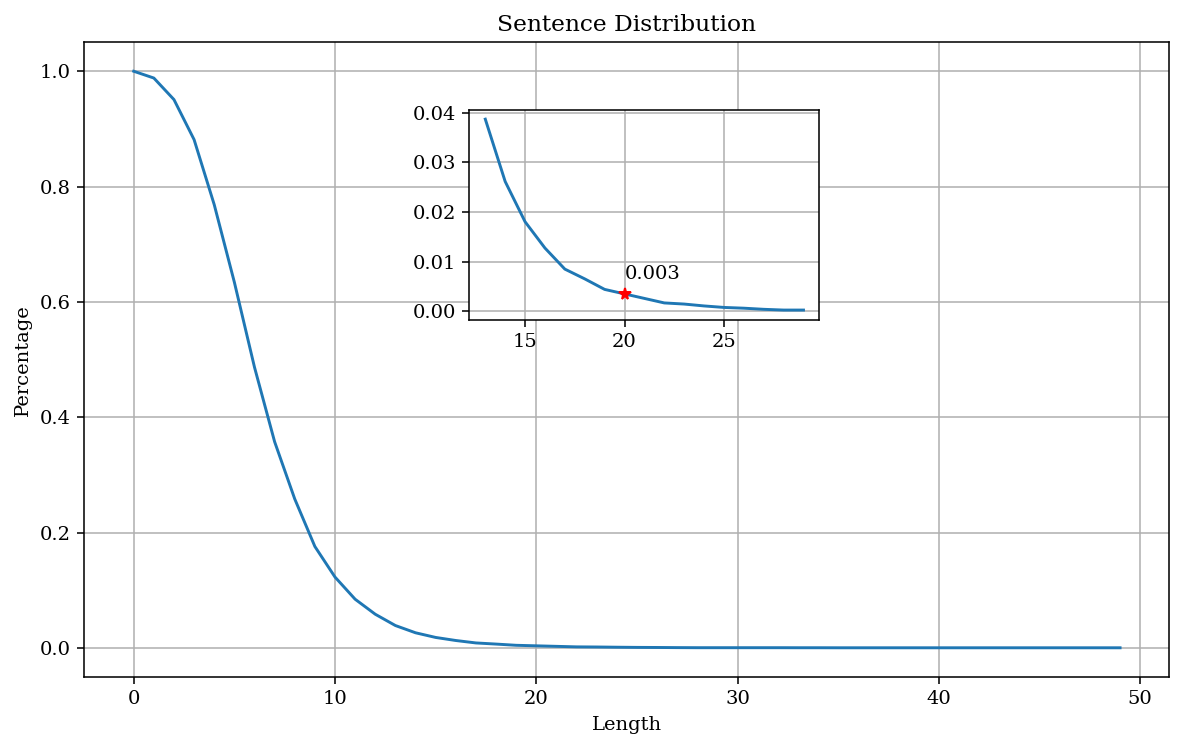

In [ ]:
plt.plot(range(50),m)
plt.title('Sentence Distribution')
plt.xlabel('Length')
plt.ylabel('Percentage')
plt.grid()
ax2 = plt.axes([0.4, 0.55, 0.25, 0.25])
ax2.plot(range(50)[13:30],m[13:30])
ax2.plot(range(50)[20],m[20],'r*')
ax2.text(range(50)[20],m[18],round(m[20],3))
plt.grid()
plt.savefig(f"{path}len_pad.png",bbox_inches='tight')

In [ ]:
l = 20
trainpadded = pad_sequences(trainsequences, padding='post', maxlen=l)
testpadded = pad_sequences(testsequences, padding='post', maxlen=l)

In [ ]:
trainpadded = pad_sequences(trainsequences, padding='post', maxlen=l)
np.sum(trainpadded[:,-1]!=0)/13217

0.004388287811152304

In [ ]:
trainpadded

array([[  20,  206,  475, ...,    0,    0,    0],
       [ 476,  125, 3003, ...,    0,    0,    0],
       [   6,   57,    9, ...,    0,    0,    0],
       ...,
       [  98,   51,    7, ...,    0,    0,    0],
       [   8,   22,    6, ...,    0,    0,    0],
       [  76,  594,   13, ...,    0,    0,    0]], dtype=int32)

In [ ]:
import numpy as np
# One hot encoding test labels
b = np.zeros((y.size, y.max() + 1))
b[np.arange(y.size), y] = 1
y = b
# One hot encoding train labels
b = np.zeros((Y.size, Y.max() + 1))
b[np.arange(Y.size), Y] = 1
Y = b

In [ ]:
from tensorflow.keras.layers import TextVectorization
TVT = TextVectorization(
    max_tokens=4000,
    standardize="lower_and_strip_punctuation",
    split="whitespace",
    ngrams=1,
    output_mode="int",
    output_sequence_length=20,
    pad_to_max_tokens=True,
    vocabulary=None,
)

In [ ]:
TVT.adapt(datatrain.utt)

In [ ]:
trainpadded = TVT(datatrain.utt)
testpadded = TVT(datatest.utt)

In [ ]:
trainpadded[0]

<tf.Tensor: shape=(20,), dtype=int64, numpy=
array([ 75,   5,   2,  38, 145,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0])>

In [ ]:
datatrain.utt.iloc[0]

'when is the next appointment'

In [ ]:
klj = np.zeros(TVT.vocabulary_size())
for i in range(TVT.vocabulary_size()):
    klj[i] = np.sum(trainpadded == i)

In [ ]:
klj[0:10]

array([173460.,   1644.,   4757.,   2706.,   2087.,   2001.,   1881.,
         1852.,   1793.,   1644.])

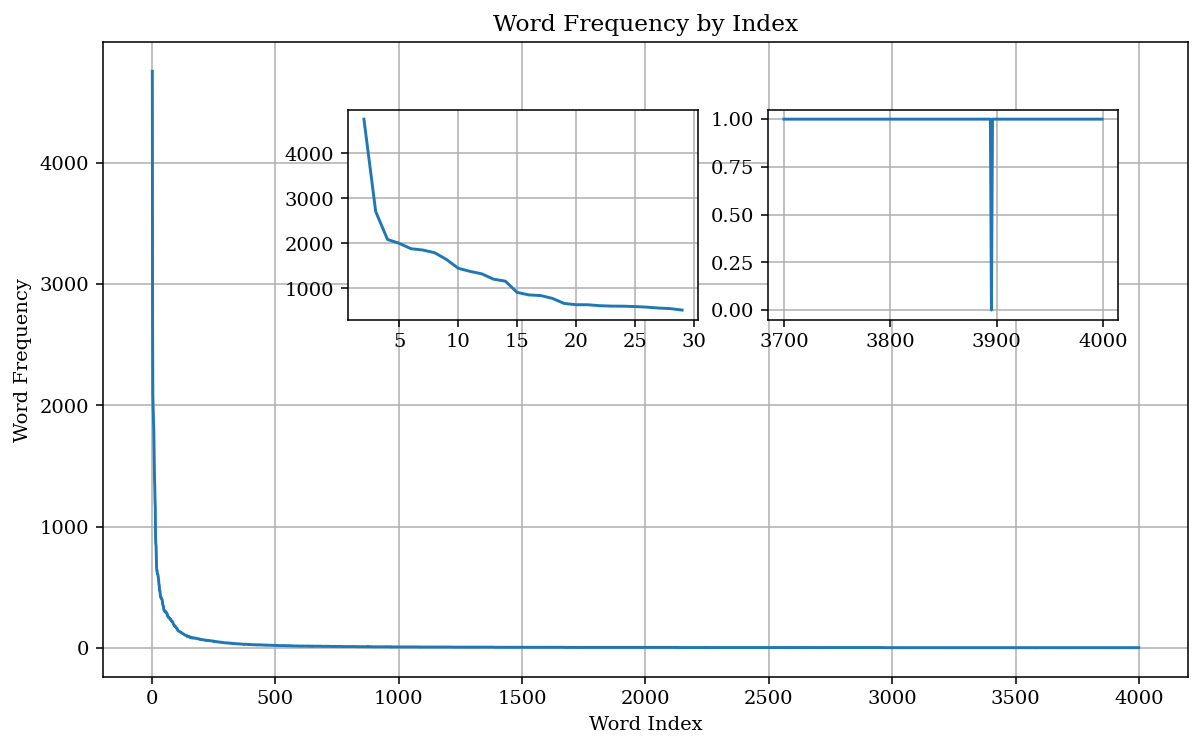

In [ ]:
plt.plot(range(len(klj))[2:],klj[2:] )
# plt.plot(xs,ys)
plt.title('Word Frequency by Index')
plt.xlabel('Word Index')
plt.ylabel("Word Frequency")
plt.grid()
ax2 = plt.axes([0.3, 0.55, 0.25, 0.25])
ax2.plot(range(len(klj))[2:30],klj[2:30])
plt.grid()
ax3 = plt.axes([0.6, 0.55, 0.25, 0.25])
ax3.plot(range(len(klj))[-300:],klj[-300:])
plt.grid()
plt.savefig(f'./word frequency.png',bbox_inches='tight')
plt.show()

In [ ]:
int(np.sqrt(np.sqrt(TVT.vocabulary_size()+1)))

7

In [ ]:
dicti = {i:j for i,j in enumerate(TVT.get_vocabulary())}

In [ ]:
dicti

In [ ]:
dir(TVT)

In [ ]:
# class myCallback(tf.keras.callbacks.Callback):

#     def on_epoch_end(self, epoch, logs={}):

#         k.append(logs.get('val_accuracy'))
#         g = np.array(k)
#         try:
#             if(np.sum(g[-1]>g[len(g)-5:-1]==3)):
#                 self.model.stop_training = True
#         except:pass
# callbacks = myCallback()

In [ ]:
# adam = tf.keras.optimizers.Adam(learning_rate=0.0001,
#  beta_1=0.9, beta_2=0.999, amsgrad=False)


In [ ]:
from keras.layers import Embedding, SimpleRNN,Flatten,Dense,Bidirectional,Dropout,LSTM,GlobalAveragePooling1D

# Normal

In [ ]:
from keras.callbacks import EarlyStopping

In [ ]:
# tf.keras.callbacks.EarlyStopping(
#     monitor="val_loss",
#     min_delta=0,
#     patience=0,
#     verbose=0,
#     mode="auto",
#     baseline=None,
#     restore_best_weights=False,
# )

In [ ]:
es = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=40,restore_best_weights=True)

In [ ]:
embedding_dim = 2 * int(np.sqrt(np.sqrt(TVT.vocabulary_size()+1)))
# embedding_dim = 20
its = TVT.vocabulary_size()+1
model = tf.keras.Sequential([
    Embedding(its, embedding_dim),

    GlobalAveragePooling1D(),

    # Dropout(0.25),
    Dense(48, activation='relu',
                          kernel_regularizer = tf.keras.regularizers.l2(0.001)
                         ),

    # Dropout(0.25),
    Dense(18, activation='softmax')
])
model.compile(optimizer=tf.keras.optimizers.RMSprop()
              ,loss='categorical_crossentropy',
              metrics=[tf.keras.metrics.Recall(),tf.keras.metrics.Precision(),'accuracy',tf.keras.metrics.AUC()]
            #   metrics=['accuracy']
              )
model.summary()

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_26 (Embedding)    (None, None, 14)          56014     
                                                                 
 global_average_pooling1d_9   (None, 14)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_31 (Dense)            (None, 48)                720       
                                                                 
 dense_32 (Dense)            (None, 18)                882       
                                                                 
Total params: 57,616
Trainable params: 57,616
Non-trainable params: 0
_________________________________________________________________


In [ ]:

history = model.fit(trainpadded,Y,32,200,validation_data=(testpadded,y),callbacks=[es])

Epoch 1/200
414/414 [==============================] - 4s 6ms/step - loss: 2.7353 - recall_20: 0.0000e+00 - precision_20: 0.0000e+00 - accuracy: 0.1449 - auc_20: 0.6704 - val_loss: 2.6528 - val_recall_20: 0.0000e+00 - val_precision_20: 0.0000e+00 - val_accuracy: 0.1889 - val_auc_20: 0.7059
Epoch 2/200
414/414 [==============================] - 1s 3ms/step - loss: 2.4837 - recall_20: 0.0135 - precision_20: 0.9781 - accuracy: 0.2382 - auc_20: 0.7573 - val_loss: 2.2756 - val_recall_20: 0.0657 - val_precision_20: 0.9909 - val_accuracy: 0.2806 - val_auc_20: 0.8173
Epoch 3/200
414/414 [==============================] - 1s 3ms/step - loss: 2.0703 - recall_20: 0.1523 - precision_20: 0.9683 - accuracy: 0.3750 - auc_20: 0.8572 - val_loss: 1.9127 - val_recall_20: 0.1904 - val_precision_20: 0.9588 - val_accuracy: 0.4588 - val_auc_20: 0.8855
Epoch 4/200
414/414 [==============================] - 1s 3ms/step - loss: 1.7505 - recall_20: 0.2610 - precision_20: 0.9661 - accuracy: 0.5158 - auc_20: 0.911

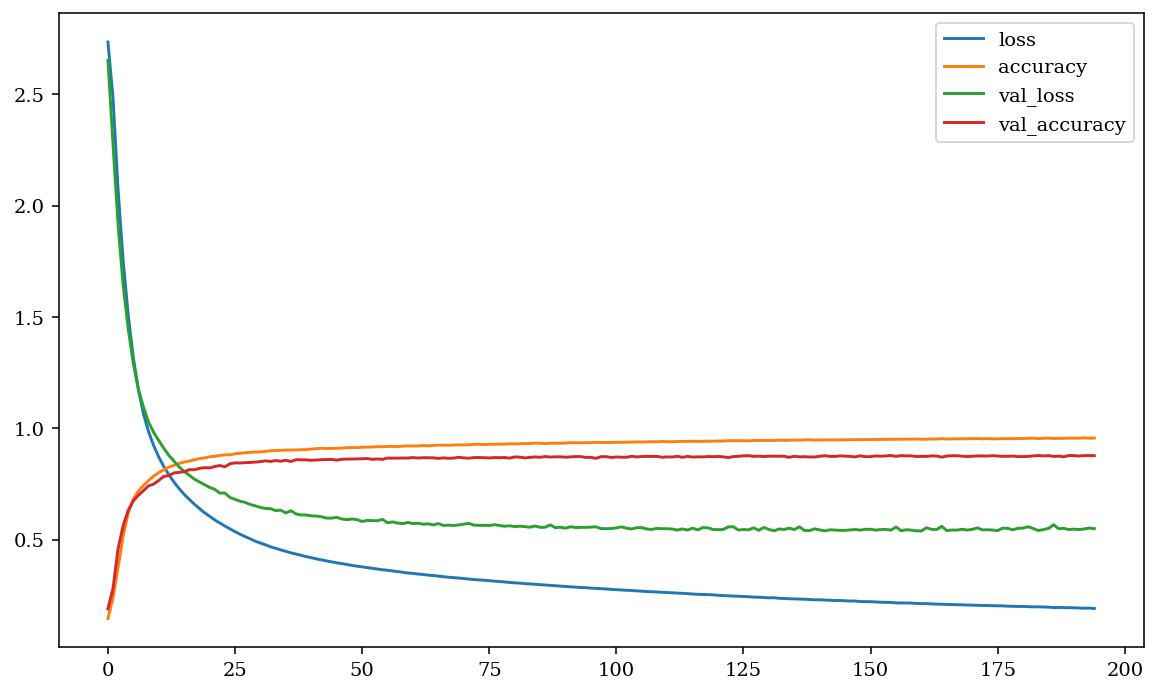

In [ ]:
lp = ['loss','accuracy', 'val_loss','val_accuracy']
pd.DataFrame(history.history)[lp].plot()

In [ ]:
path = './'

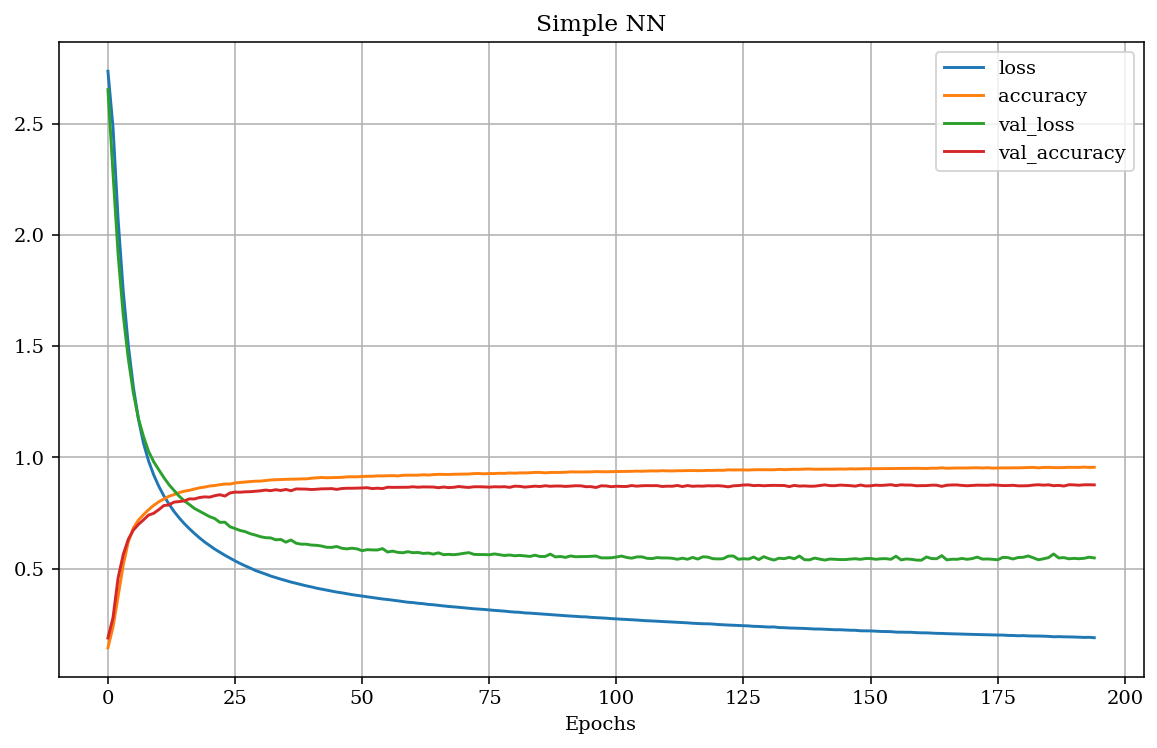

In [ ]:
normalnn = pd.DataFrame(history.history)
normalnn.to_csv(f'{path}normalnnn.csv',index=False)

pd.DataFrame(history.history)[lp].plot(grid=True);
# plt.hlines(0.89,0,len(history.history['loss']),'y')
plt.xlabel('Epochs')
plt.title('Simple NN')
plt.savefig(f'{path}Normal.png',bbox_inches='tight')

In [ ]:
from sklearn.metrics import precision_score,recall_score,accuracy_score,f1_score
y_test = model.predict(testpadded)
y_pre = y_test.argmax(axis=1)
y_tre = y.argmax(axis=1)
print(f"the accuracy is: {(y_pre==y_tre).sum()/y_pre.shape[0]}")
NormalNN= [accuracy_score(y_tre,y_pre),
      precision_score(y_tre,y_pre,average='weighted'),
      recall_score(y_tre,y_pre,average='weighted'),
      f1_score(y_tre,y_pre,average='weighted')]
pd.DataFrame(NormalNN).to_csv(f'{path}NormalN.csv',index=False)

104/104 [==============================] - 0s 2ms/step
the accuracy is: 0.8777239709443099


# Bert

In [ ]:
# !pip install transformers
import transformers
from transformers import BertTokenizer,TFBertModel,TFBertForSequenceClassification

In [ ]:
Tokenizer=BertTokenizer.from_pretrained('bert-base-cased')

Downloading:   0%|          | 0.00/213k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [ ]:
model = TFBertForSequenceClassification.from_pretrained('bert-base-cased',)

In [ ]:
datatest = dataset[0:-1:5]
datatrain = dataset.drop(datatest.index)
Y = datatrain['label'].to_numpy()
y = datatest['label'].to_numpy()

In [ ]:
tokenizer = transformers.BertTokenizer.from_pretrained('bert-base-cased', do_lower_case=True)
bert_model = transformers.TFBertModel.from_pretrained('bert-base-cased')

In [ ]:
#tokenize and encode the inputs

import transformers
from transformers import BertTokenizer,TFBertModel
tokenizer = transformers.BertTokenizer.from_pretrained('bert-base-cased', do_lower_case=True)
bert_model = transformers.TFBertModel.from_pretrained('bert-base-cased')
def bert_encode(data,maximum_length) :
    input_ids = []
    attention_masks = []
  

    for i in range(len(data)):
        encoded = tokenizer.encode_plus(
        
          data[i],
          add_special_tokens=True,
          max_length=maximum_length,
          pad_to_max_length=True,
        
          return_attention_mask=True,
        
        )
      
        input_ids.append(encoded['input_ids'])
        attention_masks.append(encoded['attention_mask'])
    return np.array(input_ids),np.array(attention_masks)

train_input_ids,train_attention_masks = bert_encode(list(datatrain['utt'][:5]),1000)

In [ ]:
train_attention_masks,train_input_ids

In [ ]:
from tensorflow import keras

In [ ]:
#Build a miniature model for extracting the embeddings
import tensorflow as tf
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import LSTM, Dense,Flatten,Conv2D,Conv1D,GlobalMaxPooling1D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers.recurrent import LSTM, GRU
# from tensorflow.keras.layers.core import Dense, Activation, Dropout
# from tensorflow.keras.layers.embeddings import Embedding
from tensorflow.keras.layers import BatchNormalization
# from tensorflow.keras.utils import np_utils
from tensorflow.keras import layers
input_ids = tf.keras.layers.Input(shape=(128,), name='input_token', dtype='int32')
input_masks_ids = tf.keras.layers.Input(shape=(128,), name='masked_token', dtype='int32')
bert_output=bert_model([input_ids,input_masks_ids])[0]
bert_output.shape
bert_output[:,0,:]
model=Model(inputs=[input_ids,input_masks_ids],outputs=[bert_output])
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_token (InputLayer)       [(None, 128)]        0           []                               
                                                                                                  
 masked_token (InputLayer)      [(None, 128)]        0           []                               
                                                                                                  
 tf_bert_model_3 (TFBertModel)  TFBaseModelOutputWi  108310272   ['input_token[0][0]',            
                                thPoolingAndCrossAt               'masked_token[0][0]']           
                                tentions(last_hidde                                               
                                n_state=(None, 128,                                           

In [ ]:
tokenizer = Tokenizer(text=list(datatrain.utt))

In [ ]:
tokenizer

In [ ]:
transformers.T*?

# LSTM

In [ ]:
# embedding_dim = int(np.sqrt(np.sqrt(len(word_index)+1)))
# embedding_dim = 32
model = tf.keras.Sequential([
    Embedding(its, embedding_dim),



    # LSTM(32,return_sequences=True),
    # GlobalAveragePooling1D(),

    LSTM(48),

    # Dropout(0.25),
        # Dense(240, activation='relu',
        #                 #   kernel_regularizer = tf.keras.regularizers.l2(0.001)
        #                  ),
    Dense(24, activation='relu',
                          kernel_regularizer = tf.keras.regularizers.l2(0.001)
                         ),

    Dropout(0.25),
    Dense(18, activation='softmax')
])
model.compile(optimizer='rmsprop'
              ,loss='categorical_crossentropy',
              metrics=[tf.keras.metrics.Recall(),tf.keras.metrics.Precision(),'accuracy',tf.keras.metrics.AUC()])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, None, 14)          56014     
                                                                 
 lstm (LSTM)                 (None, 48)                12096     
                                                                 
 dense_6 (Dense)             (None, 24)                1176      
                                                                 
 dropout_2 (Dropout)         (None, 24)                0         
                                                                 
 dense_7 (Dense)             (None, 18)                450       
                                                                 
Total params: 69,736
Trainable params: 69,736
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(trainpadded,Y,32,200,validation_data=(testpadded,y),callbacks=[es])

Epoch 1/200
414/414 [==============================] - 9s 15ms/step - loss: 2.5049 - recall_4: 0.0364 - precision_4: 0.5747 - accuracy: 0.1833 - auc_4: 0.7461 - val_loss: 2.9288 - val_recall_4: 0.1314 - val_precision_4: 0.2719 - val_accuracy: 0.1976 - val_auc_4: 0.7529
Epoch 2/200
414/414 [==============================] - 5s 13ms/step - loss: 2.0457 - recall_4: 0.1262 - precision_4: 0.7387 - accuracy: 0.3210 - auc_4: 0.8558 - val_loss: 1.8713 - val_recall_4: 0.1822 - val_precision_4: 0.8905 - val_accuracy: 0.3989 - val_auc_4: 0.8798
Epoch 3/200
414/414 [==============================] - 6s 13ms/step - loss: 1.6578 - recall_4: 0.2958 - precision_4: 0.8324 - accuracy: 0.4584 - auc_4: 0.9095 - val_loss: 1.7065 - val_recall_4: 0.3084 - val_precision_4: 0.8599 - val_accuracy: 0.4467 - val_auc_4: 0.8966
Epoch 4/200
414/414 [==============================] - 5s 13ms/step - loss: 1.3999 - recall_4: 0.3846 - precision_4: 0.8579 - accuracy: 0.5414 - auc_4: 0.9379 - val_loss: 1.4449 - val_recall

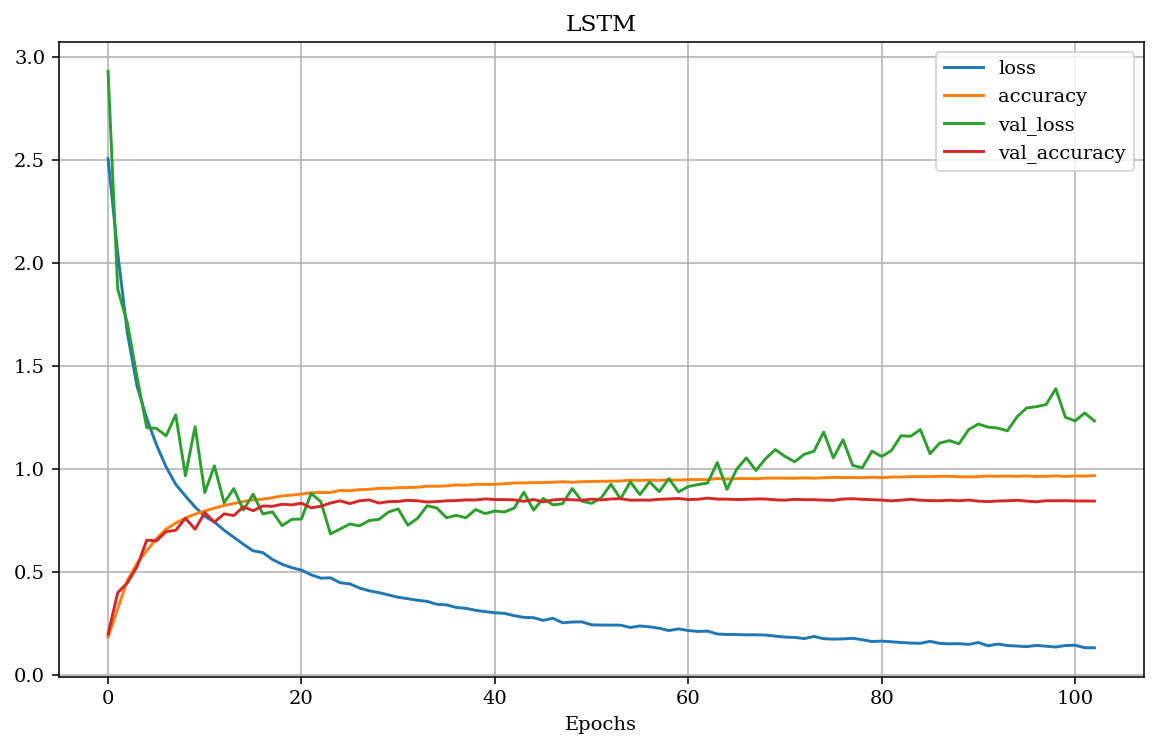

In [ ]:
lstmnn = pd.DataFrame(history.history)
lstmnn.to_csv(f'{path}lstmnn.csv',index=False)

pd.DataFrame(history.history)[lp].plot(grid=True);
# plt.hlines(0.89,0,len(history.history['loss']),'y')
plt.xlabel('Epochs')
plt.title('LSTM')
plt.savefig(f'{path}lstm.png',bbox_inches='tight')

In [ ]:
y_test = model.predict(testpadded)
y_pre = y_test.argmax(axis=1)
y_tre = y.argmax(axis=1)
print(f"the accuracy is: {(y_pre==y_tre).sum()/y_pre.shape[0]}")
LSTMNN_  = [accuracy_score(y_tre,y_pre),
      precision_score(y_tre,y_pre,average='weighted'),
      recall_score(y_tre,y_pre,average='weighted'),
      f1_score(y_tre,y_pre,average='weighted')]

104/104 [==============================] - 1s 4ms/step
the accuracy is: 0.8577481840193705


# Simple RNN

In [ ]:
from tensorflow.keras.layers import ConvLSTM1D,Conv1D,GRU,MaxPooling1D,GlobalMaxPooling1D
# dir(tf.keras.layers)

In [ ]:
# embedding_dim = int(np.sqrt(np.sqrt(len(word_index)+1)))
# embedding_dim = 32
model = tf.keras.Sequential([
    Embedding(its, embedding_dim),


    # SimpleRNN(32, return_sequences=True),
    Conv1D(48, 3, activation='relu'),
    GlobalAveragePooling1D(),
    # GlobalMaxPooling1D(),
    # MaxPooling1D(),
    # Flatten(),
    # Dropout(0.25),
    # Dense(240, activation='relu',
    #                       kernel_regularizer = tf.keras.regularizers.l2(0.001)
    #                      ),

    Dense(18, activation='softmax')
])
model.compile(optimizer='rmsprop'
              ,loss='categorical_crossentropy',
              metrics=[tf.keras.metrics.Recall(),tf.keras.metrics.Precision(),'accuracy',tf.keras.metrics.AUC()])
model.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_19 (Embedding)    (None, None, 14)          56014     
                                                                 
 conv1d_14 (Conv1D)          (None, None, 48)          2064      
                                                                 
 global_average_pooling1d_6   (None, 48)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_22 (Dense)            (None, 18)                882       
                                                                 
Total params: 58,960
Trainable params: 58,960
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(trainpadded,Y,32,200,validation_data=(testpadded,y),callbacks=[es])

Epoch 1/200
414/414 [==============================] - 4s 8ms/step - loss: 2.6644 - recall_15: 2.2698e-04 - precision_15: 1.0000 - accuracy: 0.1812 - auc_15: 0.6933 - val_loss: 2.4765 - val_recall_15: 0.0036 - val_precision_15: 0.9231 - val_accuracy: 0.2321 - val_auc_15: 0.7496
Epoch 2/200
414/414 [==============================] - 3s 6ms/step - loss: 2.1341 - recall_15: 0.0868 - precision_15: 0.9198 - accuracy: 0.3704 - auc_15: 0.8314 - val_loss: 1.8101 - val_recall_15: 0.2119 - val_precision_15: 0.9421 - val_accuracy: 0.5166 - val_auc_15: 0.8819
Epoch 3/200
414/414 [==============================] - 3s 6ms/step - loss: 1.5021 - recall_15: 0.3247 - precision_15: 0.9550 - accuracy: 0.5969 - auc_15: 0.9267 - val_loss: 1.3273 - val_recall_15: 0.4041 - val_precision_15: 0.9277 - val_accuracy: 0.6362 - val_auc_15: 0.9427
Epoch 4/200
414/414 [==============================] - 3s 6ms/step - loss: 1.1127 - recall_15: 0.4751 - precision_15: 0.9481 - accuracy: 0.6999 - auc_15: 0.9627 - val_loss

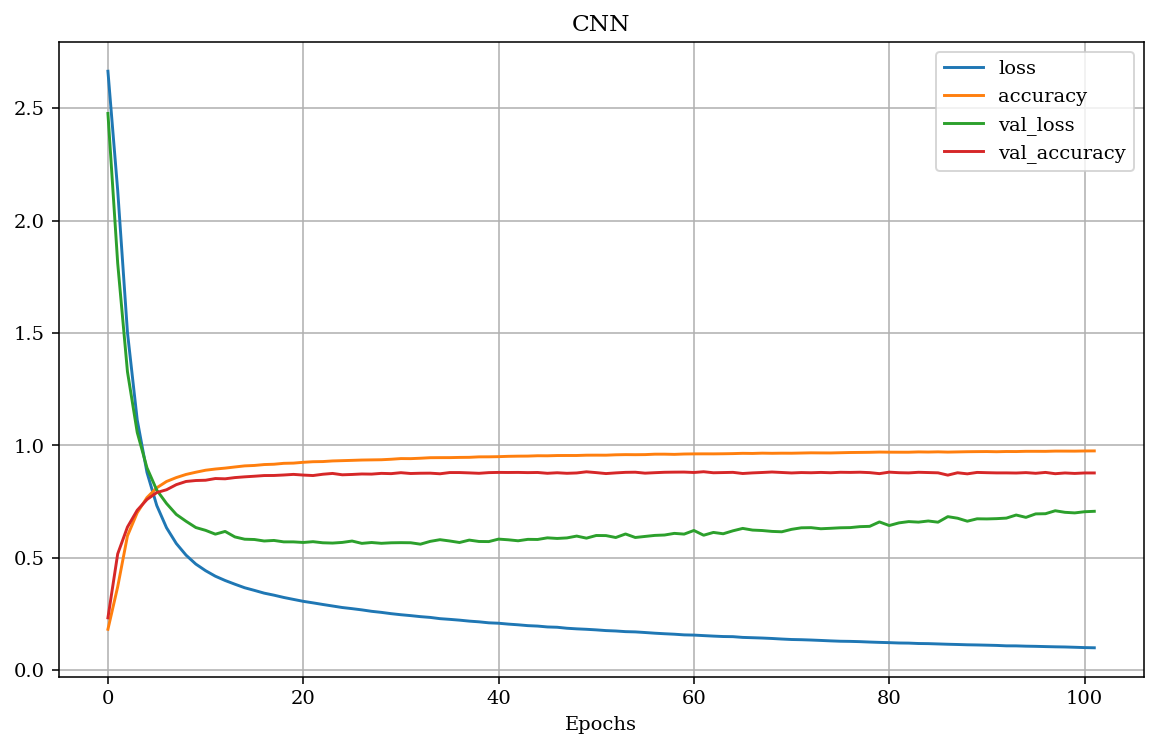

In [ ]:
rnnnn = pd.DataFrame(history.history)
rnnnn.to_csv(f'{path}rnnnn.csv',index=False)

pd.DataFrame(history.history)[lp].plot(grid=True);
# plt.hlines(0.89,0,len(history.history['loss']),'y')
plt.xlabel('Epochs')
plt.title('CNN')
plt.savefig(f'{path}rnn.png',bbox_inches='tight')

In [ ]:
from sklearn.metrics import precision_score,recall_score,accuracy_score,f1_score
y_test = model.predict(testpadded)
y_pre = y_test.argmax(axis=1)
y_tre = y.argmax(axis=1)
print(f"the accuracy is: {(y_pre==y_tre).sum()/y_pre.shape[0]}")
rnnnn_ = [accuracy_score(y_tre,y_pre),
      precision_score(y_tre,y_pre,average='weighted'),
      recall_score(y_tre,y_pre,average='weighted'),
      f1_score(y_tre,y_pre,average='weighted')]

104/104 [==============================] - 0s 2ms/step
the accuracy is: 0.8822639225181598


# sam

In [ ]:
# embedding_dim = int(np.sqrt(np.sqrt(len(word_index)+1)))
# embedding_dim = 32
model = tf.keras.Sequential([
    Embedding(its, embedding_dim),


    # SimpleRNN(32, return_sequences=True),
    GRU(48, activation='relu'),
    # GlobalAveragePooling1D(),
    # GlobalMaxPooling1D(),
    # MaxPooling1D(),
    # Flatten(),
    # Dropout(0.25),
    # Dense(240, activation='relu',
    #                       kernel_regularizer = tf.keras.regularizers.l2(0.001)
    #                      ),

    Dense(18, activation='softmax')
])
model.compile(optimizer='rmsprop'
              ,loss='categorical_crossentropy',
              metrics=[tf.keras.metrics.Recall(),tf.keras.metrics.Precision(),'accuracy',tf.keras.metrics.AUC()])
model.summary()

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_23 (Embedding)    (None, None, 14)          56014     
                                                                 
 gru_1 (GRU)                 (None, 48)                9216      
                                                                 
 dense_27 (Dense)            (None, 18)                882       
                                                                 
Total params: 66,112
Trainable params: 66,112
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(trainpadded,Y,32,200,validation_data=(testpadded,y),callbacks=[es])

Epoch 1/200
414/414 [==============================] - 10s 15ms/step - loss: 2.4879 - recall_17: 0.0315 - precision_17: 0.7260 - accuracy: 0.1749 - auc_17: 0.7482 - val_loss: 2.3875 - val_recall_17: 0.0191 - val_precision_17: 0.3043 - val_accuracy: 0.2146 - val_auc_17: 0.7818
Epoch 2/200
414/414 [==============================] - 5s 13ms/step - loss: 1.9969 - recall_17: 0.1205 - precision_17: 0.7578 - accuracy: 0.3226 - auc_17: 0.8678 - val_loss: 2.1323 - val_recall_17: 0.1910 - val_precision_17: 0.5228 - val_accuracy: 0.2975 - val_auc_17: 0.8610
Epoch 3/200
414/414 [==============================] - 5s 13ms/step - loss: 1.7954 - recall_17: 0.1716 - precision_17: 0.7421 - accuracy: 0.3974 - auc_17: 0.8996 - val_loss: 1.8456 - val_recall_17: 0.1804 - val_precision_17: 0.8255 - val_accuracy: 0.3935 - val_auc_17: 0.8941
Epoch 4/200
414/414 [==============================] - 6s 14ms/step - loss: 1.6334 - recall_17: 0.2230 - precision_17: 0.8110 - accuracy: 0.4746 - auc_17: 0.9172 - val_los

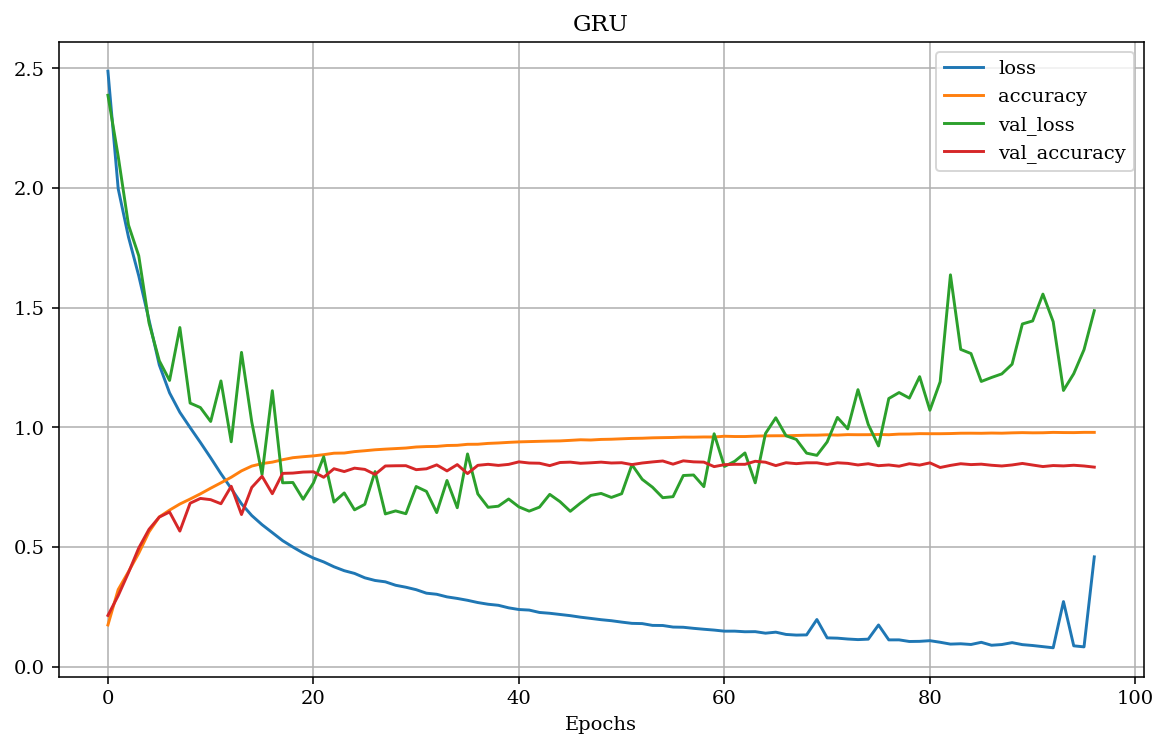

In [ ]:
gnnnn = pd.DataFrame(history.history)
gnnnn.to_csv(f'{path}gnnnn.csv',index=False)

pd.DataFrame(history.history)[lp].plot(grid=True);
# plt.hlines(0.89,0,len(history.history['loss']),'y')
plt.xlabel('Epochs')
plt.title('GRU')
plt.savefig(f'{path}gnn.png',bbox_inches='tight')

In [ ]:
from sklearn.metrics import precision_score,recall_score,accuracy_score,f1_score
y_test = model.predict(testpadded)
y_pre = y_test.argmax(axis=1)
y_tre = y.argmax(axis=1)
print(f"the accuracy is: {(y_pre==y_tre).sum()/y_pre.shape[0]}")
rnnnn_ = [accuracy_score(y_tre,y_pre),
      precision_score(y_tre,y_pre,average='weighted'),
      recall_score(y_tre,y_pre,average='weighted'),
      f1_score(y_tre,y_pre,average='weighted')]

104/104 [==============================] - 1s 4ms/step
the accuracy is: 0.8604721549636803


# LSTM Bidirectional

In [ ]:
# embedding_dim = int(np.sqrt(np.sqrt(len(word_index)+1)))
# embedding_dim = 8
# its = 5656


model = tf.keras.Sequential([
    Embedding(its, embedding_dim),
    # Bidirectional(tf.keras.layers.LSTM(16,
    #                                                    return_sequences=True,
    #                                                    dropout=0.3)),
    # Bidirectional(tf.keras.layers.LSTM(8,
    #                                                    return_sequences=True,
    #                                                    dropout=0.3)),
    Bidirectional(tf.keras.layers.LSTM(24)),
#     Flatten(),

    # Dense(48, activation='relu',
    #                       kernel_regularizer = tf.keras.regularizers.l2(0.001)
    #                      ),

    # Dropout(0.25),
    Dense(18, activation='softmax')
])
model.compile(optimizer='rmsprop'
              ,loss='categorical_crossentropy',
              metrics=[tf.keras.metrics.Recall(),tf.keras.metrics.Precision(),'accuracy',tf.keras.metrics.AUC()])
model.summary()

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_25 (Embedding)    (None, None, 14)          56014     
                                                                 
 bidirectional_2 (Bidirectio  (None, 48)               7488      
 nal)                                                            
                                                                 
 dense_30 (Dense)            (None, 18)                882       
                                                                 
Total params: 64,384
Trainable params: 64,384
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(trainpadded,Y,32,200,validation_data=(testpadded,y),callbacks=[es])

Epoch 1/200
414/414 [==============================] - 13s 19ms/step - loss: 2.2851 - recall_19: 0.0670 - precision_19: 0.8824 - accuracy: 0.2812 - auc_19: 0.7953 - val_loss: 1.8394 - val_recall_19: 0.1650 - val_precision_19: 0.9663 - val_accuracy: 0.4495 - val_auc_19: 0.8848
Epoch 2/200
414/414 [==============================] - 7s 16ms/step - loss: 1.4517 - recall_19: 0.3434 - precision_19: 0.9153 - accuracy: 0.5748 - auc_19: 0.9285 - val_loss: 1.2662 - val_recall_19: 0.3853 - val_precision_19: 0.9231 - val_accuracy: 0.6304 - val_auc_19: 0.9465
Epoch 3/200
414/414 [==============================] - 7s 16ms/step - loss: 1.0262 - recall_19: 0.5123 - precision_19: 0.9230 - accuracy: 0.7121 - auc_19: 0.9641 - val_loss: 1.2985 - val_recall_19: 0.4513 - val_precision_19: 0.9175 - val_accuracy: 0.6196 - val_auc_19: 0.9384
Epoch 4/200
414/414 [==============================] - 7s 16ms/step - loss: 0.7699 - recall_19: 0.6728 - precision_19: 0.9329 - accuracy: 0.7961 - auc_19: 0.9763 - val_los

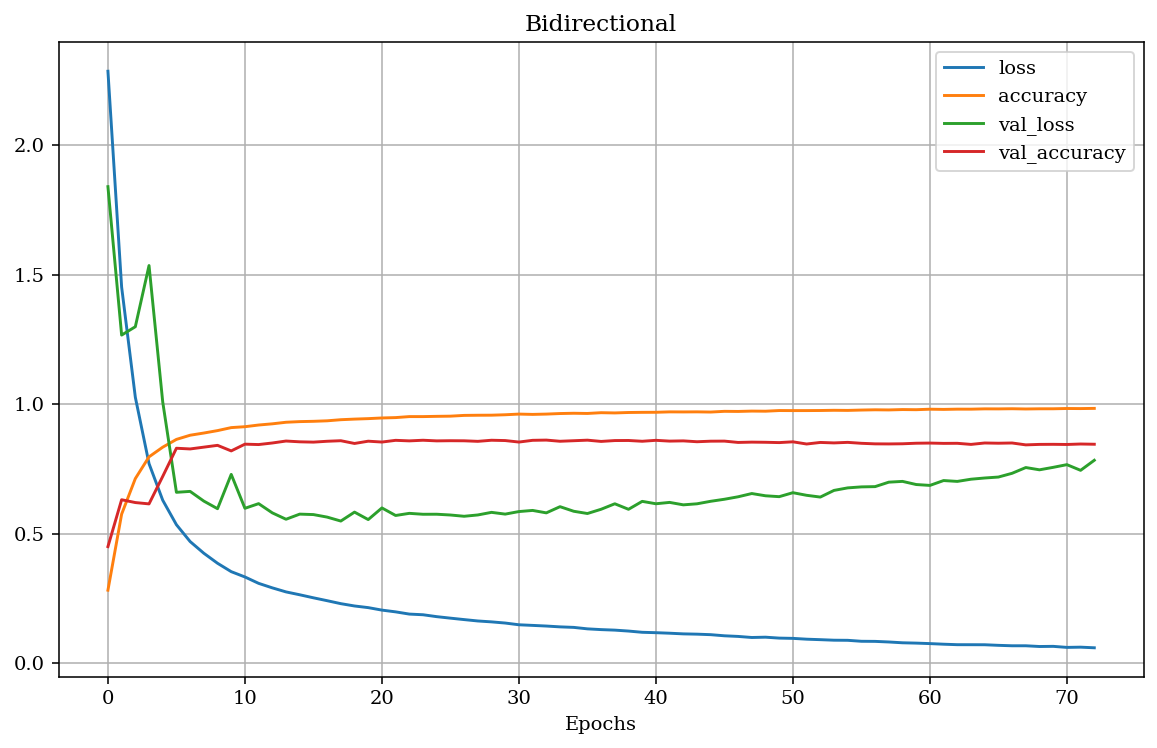

In [ ]:
Bidirectionalnn = pd.DataFrame(history.history)
Bidirectionalnn.to_csv(f'{path}Bidirectionalnn.csv',index=False)
pd.DataFrame(history.history)[lp].plot(grid=True);
# plt.hlines(0.89,0,len(history.history['loss']),'y')
plt.xlabel('Epochs')
plt.title('Bidirectional')
plt.savefig(f'{path}Bidirectional.png',bbox_inches='tight')

In [ ]:
from sklearn.metrics import precision_score,recall_score,accuracy_score,f1_score
y_test = model.predict(testpadded)
y_pre = y_test.argmax(axis=1)
y_tre = y.argmax(axis=1)
print(f"the accuracy is: {(y_pre==y_tre).sum()/y_pre.shape[0]}")
Bidirectionalnn_ = [accuracy_score(y_tre,y_pre),
      precision_score(y_tre,y_pre,average='weighted'),
      recall_score(y_tre,y_pre,average='weighted'),
      f1_score(y_tre,y_pre,average='weighted')]

104/104 [==============================] - 1s 4ms/step
the accuracy is: 0.860774818401937


In [ ]:
# pd.DataFrame(y_test).to_csv(f'{path}ytest.csv',index=False)
# pd.DataFrame(y).to_csv(f'{path}y.csv',index=False)


# results

In [ ]:
list(gnnnn.iloc[56][-4:])

[0.8444309830665588, 0.887122392654419, 0.8604721426963806, 0.9714231491088867]

In [ ]:
list(Bidirectionalnn.iloc[41][-4:])

[0.8541162014007568, 0.899298906326294, 0.8713680505752563, 0.9745736718177795]

In [ ]:
# rnnnn
list(rnnnn.iloc[61][-4:])

[0.8631961345672607,
 0.9100191593170166,
 0.8822638988494873,
 0.9807654023170471]

In [ ]:
po  = pd.DataFrame()
po['SimpleNN'] = list(normalnn.iloc[154][-4:])
po['CNN'] = list(rnnnn.iloc[61][-4:])
po['GRU'] = list(gnnnn.iloc[56][-4:])
po['BiLSTM'] = list(Bidirectionalnn.iloc[32][-4:])


In [ ]:
po.index = ['Recall','Precision','Accuracy','AUC']

In [ ]:
po.to_csv('./po.csv',index=False)
po

,SimpleNN,CNN,GRU,BiLSTM
Recall,0.852906,0.863196,0.844431,0.849274
Precision,0.910501,0.910019,0.887122,0.890794
Accuracy,0.877724,0.882264,0.860472,0.860775
AUC,0.982932,0.980765,0.971423,0.979672


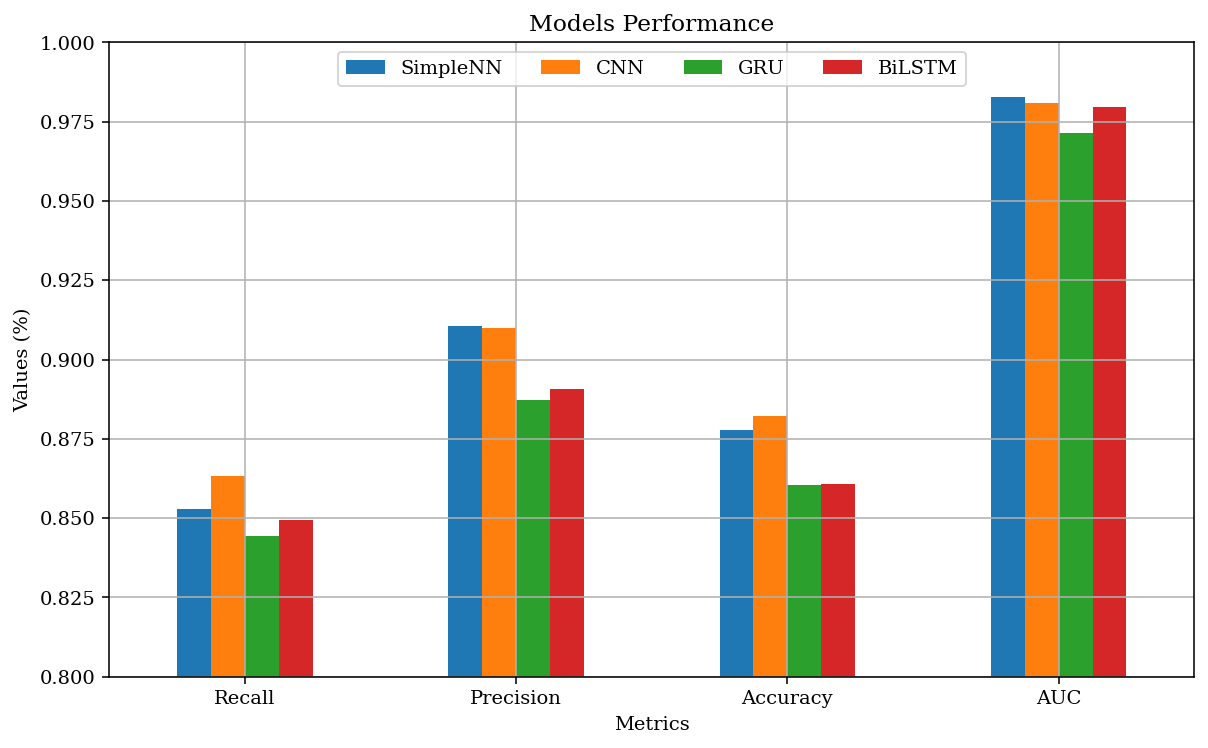

In [ ]:
po.plot(grid=True,kind='bar')
plt.ylim(0.8,1)
plt.xlabel("Metrics")
plt.xticks(rotation=0)
plt.ylabel("Values (%)")
plt.title("Models Performance")
plt.legend(loc='upper center',ncol=4)
plt.savefig(f'{path}model_performances.png',bbox_inches='tight')

In [ ]:
y = pd.read_csv(f'{path}y.csv')
y_test = pd.read_csv(f'{path}ytest.csv')

In [ ]:
print(f"the accuracy is: {(y_pre==y_tre).sum()/y_pre.shape[0]}")

the accuracy is: 0.8734866828087167


In [ ]:
y_pre = y_test.to_numpy().argmax(axis=1)
y_tre = y.to_numpy().argmax(axis=1)

# TFIDS

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer,TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

In [ ]:
dsdum = dataset
dsdum['target'] = dsdum['scenario'].factorize()[0]
datats = dsdum[0:-1:5]
datatr = dsdum.drop(datats.index)
print("train size: {}\ntest size {}".format(datatr.shape[0],datats.shape[0]))

train size: 13217
test size 3304


In [ ]:
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', ngram_range=(1, 3))
tfidffitted = tfidf.fit(datatr.utt)


In [ ]:
datatr

In [ ]:
cols = np.array(sorted({(i,j) for j,i in tfidf.vocabulary_.items()}))[:,1]

In [ ]:
X = tfidffitted.transform(datatr.utt).toarray()
Y = datatr['target'].to_numpy()
x = tfidffitted.transform(datats.utt).toarray()
y = datats['target'].to_numpy()

X.shape,x.shape

((13217, 5516), (3304, 5516))

In [ ]:
dataset_dummys = pd.DataFrame(X,columns=cols)

In [ ]:
dataset_dummys['target'] = Y


In [ ]:
# One hot encoding test labels
b = np.zeros((y.size, y.max() + 1))
b[np.arange(y.size), y] = 1
y = b
# One hot encoding train labels
b = np.zeros((Y.size, Y.max() + 1))
b[np.arange(Y.size), Y] = 1
Y = b

In [ ]:
# Creating the deep learning model
model = tf.keras.Sequential()
model.add(Input( shape=(X.shape[1],)))

# model.add(layers.Dense(256,'relu',kernel_regularizer = tf.keras.regularizers.L2(0.001)))
# model.add(layers.Dropout(0.3))

model.add(layers.Dense(128,'relu',kernel_regularizer = tf.keras.regularizers.L2(0.001)))
model.add(layers.Dropout(0.3))

model.add(layers.Dense(64,'relu',kernel_regularizer = tf.keras.regularizers.L2(0.001)))
model.add(layers.Dropout(0.3))

model.add(layers.Dense(18, activation='softmax'))

model.summary()
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history = model.fit(X,Y,32,8,validation_data=(x,y))

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_26 (Dense)            (None, 128)               706176    
                                                                 
 dropout_15 (Dropout)        (None, 128)               0         
                                                                 
 dense_27 (Dense)            (None, 64)                8256      
                                                                 
 dropout_16 (Dropout)        (None, 64)                0         
                                                                 
 dense_28 (Dense)            (None, 18)                1170      
                                                                 
Total params: 715,602
Trainable params: 715,602
Non-trainable params: 0
_________________________________________________________________
Epoch 1/8
414/414 [============================

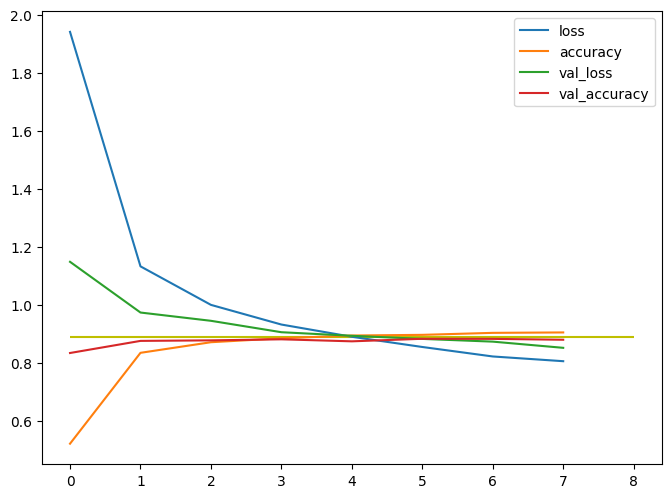

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8,6));
plt.hlines(0.89,0,len(history.history['loss']),'y')

# Part 2 DataStuff

In [ ]:
lst = [[] for i in range(18)]

In [ ]:
for i in set(dataset_dummy.target):
    lst[i] = dataset_dummy[dataset_dummy.target==i].index

In [ ]:
cols = dataset_dummy.columns

In [ ]:
dts = dataset_dummy.drop('target',axis=1)

In [ ]:
label

Index(['alarm', 'audio', 'iot', 'calendar', 'play', 'general', 'datetime',
       'takeaway', 'news', 'music', 'weather', 'qa', 'social',
       'recommendation', 'cooking', 'transport', 'email', 'lists'],
      dtype='object')

In [ ]:
pie = []
for (method, group) in dataset_dummys.groupby('target'):
    pie.append(group.shape[0])
pie

[441,
 306,
 877,
 1894,
 1615,
 767,
 465,
 296,
 571,
 383,
 677,
 1355,
 452,
 481,
 255,
 643,
 1103,
 636]

Text(0.5, 1.0, 'Count Plot')

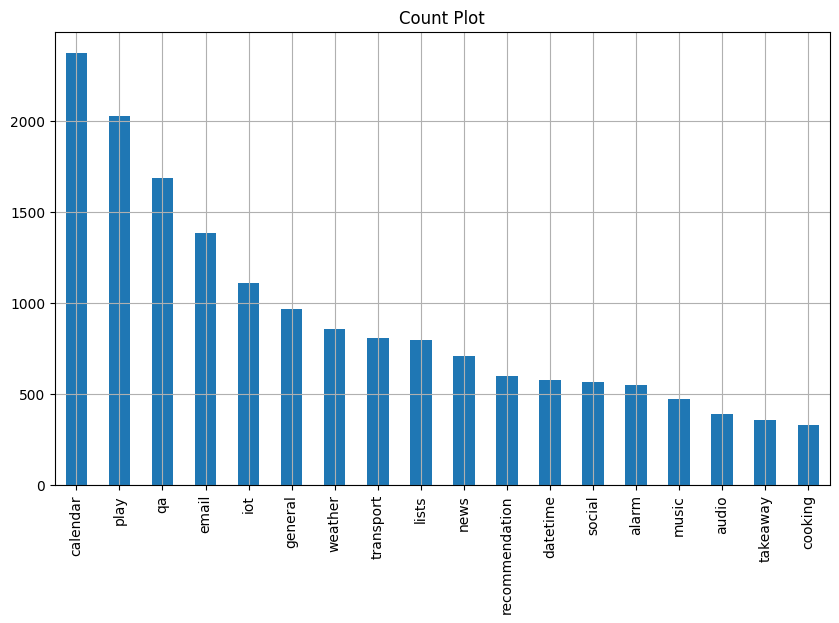

In [ ]:
dataset['scenario'].value_counts().plot.bar(grid=True)
plt.title("Count Plot")
# plt.savefig(f"{path}/countsplot.png",bbox_inches='tight')

In [ ]:
s = 4
dt = dts.loc[lst[s]]
print("num: {}".format(dt.shape[0]))
dt_num = dt.sum(axis=0).to_numpy()
dt_nump = pd.Series(dt_num)
dt_nump = dt_nump.sort_values()
ind = dt_nump.index
print(label[s])
cols[list(ind[int(ind.shape[0]*0.99):])]

num: 2024
play


Index(['کنم', 'آهنگی', 'شده', 'خبر', 'جاز', 'برایم', 'آن', 'راه', 'بیا',
       'شطرنج', 'مونولوگ', 'ترس', 'رادیویی', 'پیدا', 'دوست', 'ها', 'شادمهر',
       'ایوان', 'دارم', 'بند', 'راک', 'برو', 'با', 'دا', 'بده', 'میتونی',
       'شروع', 'جوان', 'بعد', 'این', 'موزیک', 'آخرین', 'علاقه', 'چند', 'بزار',
       'ادامه', 'مورد', 'تا', 'یک', 'بعدی', 'باز', 'برای', 'کنی', 'قسمت',
       'میخوام', 'که', 'ابی', 'رو', 'در', 'روشن', 'بدم', 'کتاب', 'بازی',
       'فایل', 'لیست', 'گوش', 'به', 'لطفا', 'های', 'صوتی', 'رادیو', 'از', 'من',
       'آهنگ', 'را', 'پخش', 'کن'],
      dtype='object')

In [ ]:
label

Index(['alarm', 'audio', 'iot', 'calendar', 'play', 'general', 'datetime',
       'takeaway', 'news', 'music', 'weather', 'qa', 'social',
       'recommendation', 'cooking', 'transport', 'email', 'lists'],
      dtype='object')

In [ ]:
play = dts.loc[lst[4]]
music = dts.loc[lst[9]]

In [ ]:
cols[np.flip(np.argsort(music.sum(axis=0).to_numpy()))[0:10]]

Index(['را', 'این', 'آهنگ', 'من', 'کن', 'اهنگ', 'پخش', 'در', 'به', 'چه'], dtype='object')

In [ ]:
cols[np.flip(np.argsort(play.sum(axis=0).to_numpy()))[0:10]]

Index(['کن', 'پخش', 'را', 'آهنگ', 'من', 'از', 'رادیو', 'صوتی', 'های', 'لطفا'], dtype='object')

In [ ]:
corr = dataset_dummys.groupby('target').aggregate(['mean']).T.corr()

In [ ]:
cor = corr.to_numpy()

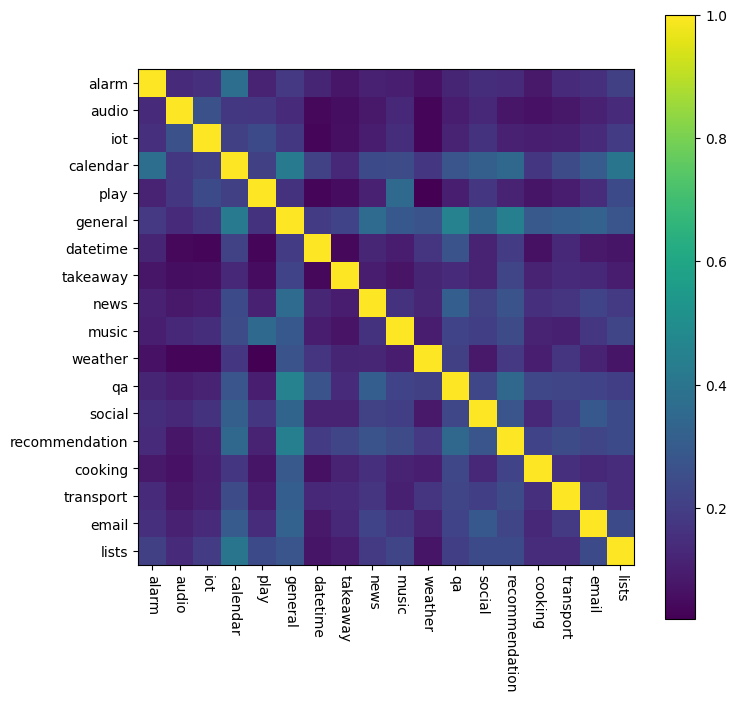

In [ ]:
# Correlation between All Classes
plt.figure(figsize=(8,8))
plt.imshow(cor)
plt.colorbar()
plt.yticks(labels=label,ticks=range(18))
plt.xticks(labels=label,ticks=range(18),rotation=-90)
plt.show()